Prodigy Infotech Internship Task 4 - Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df1 = pd.read_csv(r'https://raw.githubusercontent.com/KeerthanaPalanikumar/Prodigy-Infotech/refs/heads/main/Prodigy%20DS%20Internship/Task4/twitter_training.csv')
df2 = pd.read_csv(r"C:\Users\Abc\Downloads\twitter_validation.csv")

In [4]:
print('\n Twitter Trainning:\n', df1.columns)
print('\n Twitter Validation:\n', df2.columns)


 Twitter Trainning:
 Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

 Twitter Validation:
 Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [6]:
# Load datasets
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df1 = pd.read_csv(r'https://raw.githubusercontent.com/KeerthanaPalanikumar/Prodigy-Infotech/refs/heads/main/Prodigy%20DS%20Internship/Task4/twitter_training.csv', names=col_names)
df2 = pd.read_csv(r"C:\Users\Abc\Downloads\twitter_validation.csv", names=col_names)

# viewing dataset's column name
print('\n Twitter Trainning:\n', df1.columns)
print('\n Twitter Validation:\n', df2.columns)


 Twitter Trainning:
 Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

 Twitter Validation:
 Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')


In [7]:
# Combine the datasets
df = pd.concat([df1, df2])

# Drop null values
df.dropna(subset=['Content'], inplace=True)

In [8]:
# Replace 'Irrelevant' with 'Neutral' in 'Sentiment' column
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

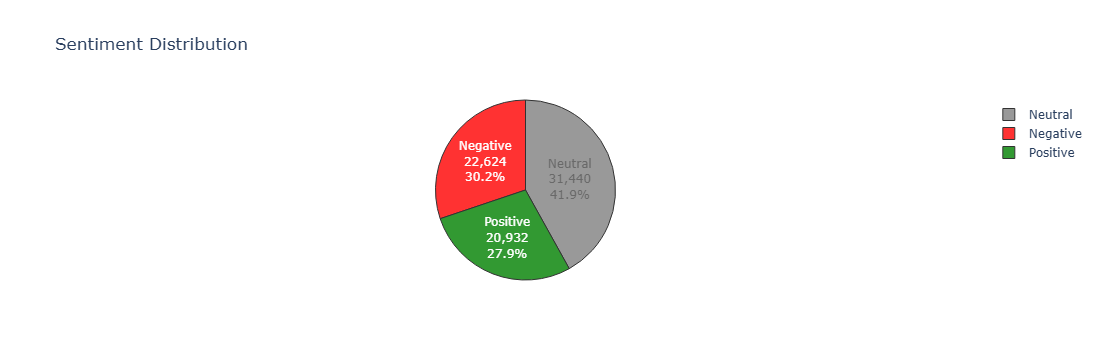

In [10]:
# Sentiment distribution (Pie Chart)
sentiment_counts = df['Sentiment'].value_counts().sort_index()
sentiment_colors = ['red', 'grey', 'green']

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto')])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white'
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1, 
                  opacity=0.8)
 
fig.show()

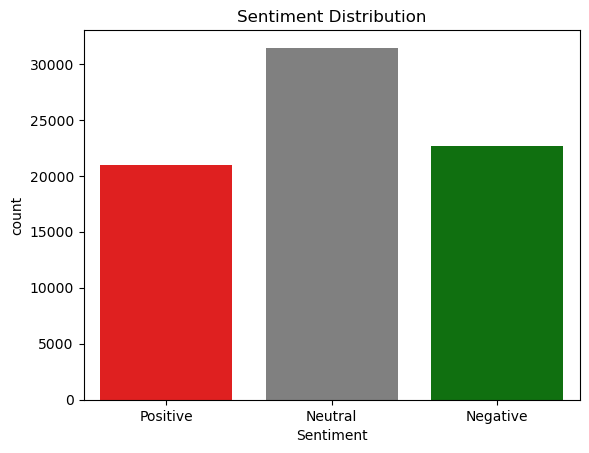

In [11]:
# Sentiment distribution (Bar Chart)
sns.countplot(x='Sentiment', data=df, hue='Sentiment', palette=sentiment_colors, dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.show()


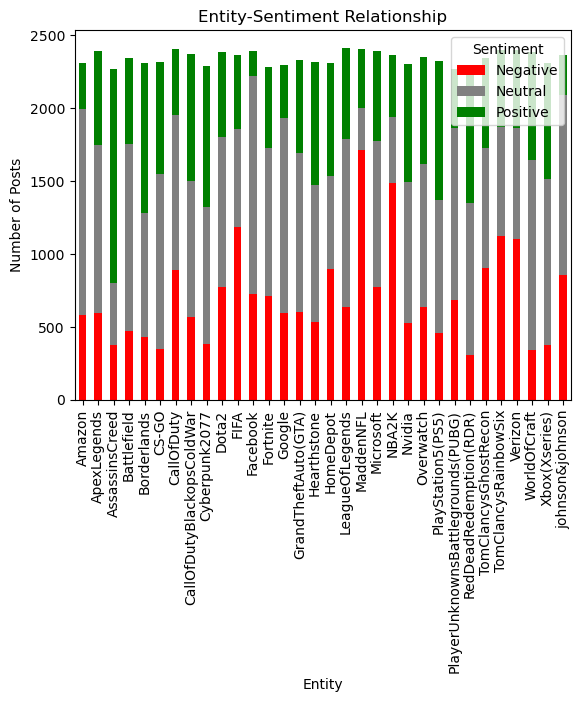

In [12]:
entity_sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)
entity_sentiment_counts.plot(kind='bar', stacked=True, color=sentiment_colors)
plt.title('Entity-Sentiment Relationship')
plt.xlabel('Entity')
plt.ylabel('Number of Posts')
plt.show()

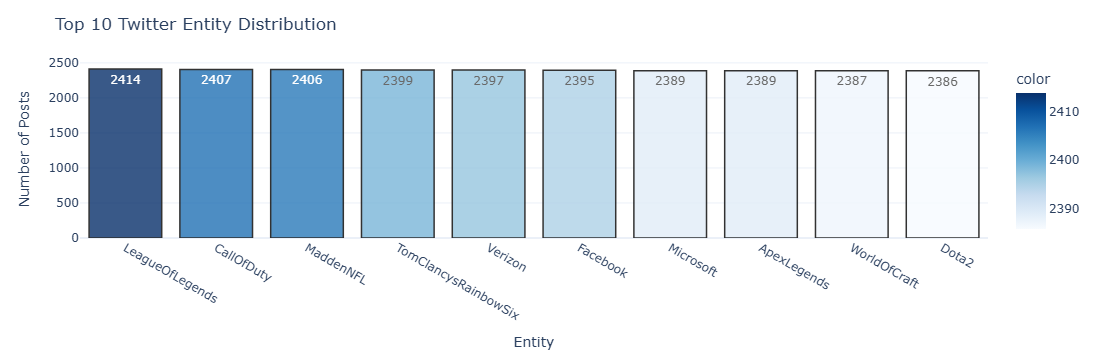

In [13]:
# Top 10 entities
top10_entity_counts = df['Entity'].value_counts().sort_values(ascending=False)[:10]

fig = px.bar(x=top10_entity_counts.index, 
             y=top10_entity_counts.values,
             color=top10_entity_counts.values,
             text=top10_entity_counts.values,
             color_continuous_scale='Blues')

fig.update_layout(
    title_text='Top 10 Twitter Entity Distribution',
    template='plotly_white',
    xaxis=dict(title='Entity'),
    yaxis=dict(title='Number of Posts')
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()

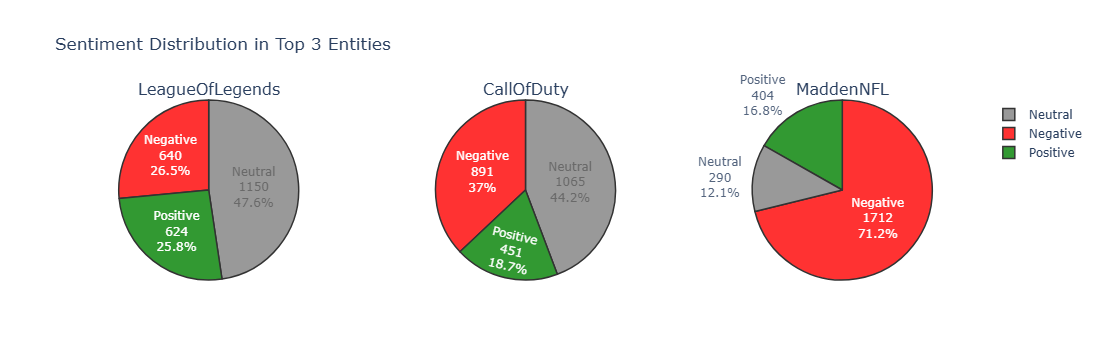

In [14]:
top3_entity = top10_entity_counts.index[:3]
sentiment_by_entity = df[df['Entity'].isin(top3_entity)].groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

fig = make_subplots(rows=1, cols=3, 
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=top3_entity)

for i, entity in enumerate(top3_entity):
    fig.add_trace(
        go.Pie(labels=sentiment_by_entity.columns, 
               values=sentiment_by_entity.loc[entity],
               textinfo='percent+value+label',
               marker_colors=sentiment_colors,
               textposition='auto',
               name=entity),
        row=1, col=i+1
    )

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)

fig.update_layout(title_text='Sentiment Distribution in Top 3 Entities')
fig.show()

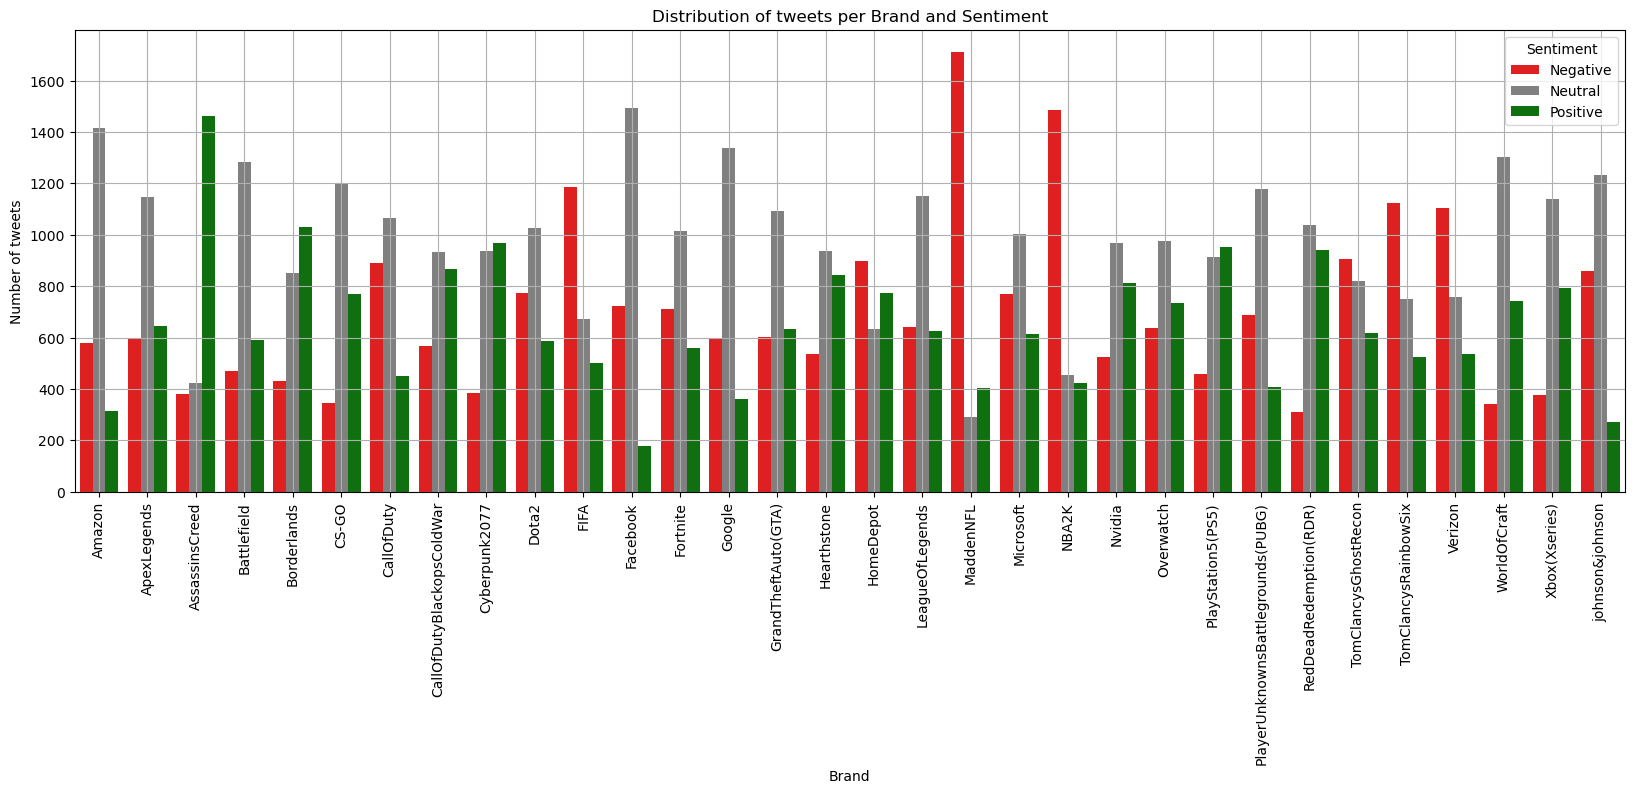

In [15]:
# Count entity per category
plot1 = df.groupby(by=["Entity","Sentiment"]).count().reset_index()

plt.figure(figsize=(20,6))
sns.barplot(data=plot1, x="Entity", y="ID", hue="Sentiment", palette=sentiment_colors)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Brand and Sentiment")
plt.show()